<span style="font-size:30px">#Blinkit_data_visualization</span>


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
file_path = (r'C:\Users\ASUS\OneDrive\Desktop\project\infotact_project\p1\BlinkIT Grocery Data.xlsx')

# Load the data
df = pd.read_excel(file_path, sheet_name='BlinkIT Grocery Data')


In [5]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


In [7]:
# Fill missing 'Item Weight' with mean
df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11376\2158804478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)


In [8]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [9]:
# Fix inconsistent 'Item Fat Content'
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [10]:
# Confirm the fix
print("Unique values in 'Item Fat Content':", df['Item Fat Content'].unique())

Unique values in 'Item Fat Content': ['Regular' 'Low Fat']


<span style="font-size:30px">Basic EDA (Exploratory Data Analysis)</span>


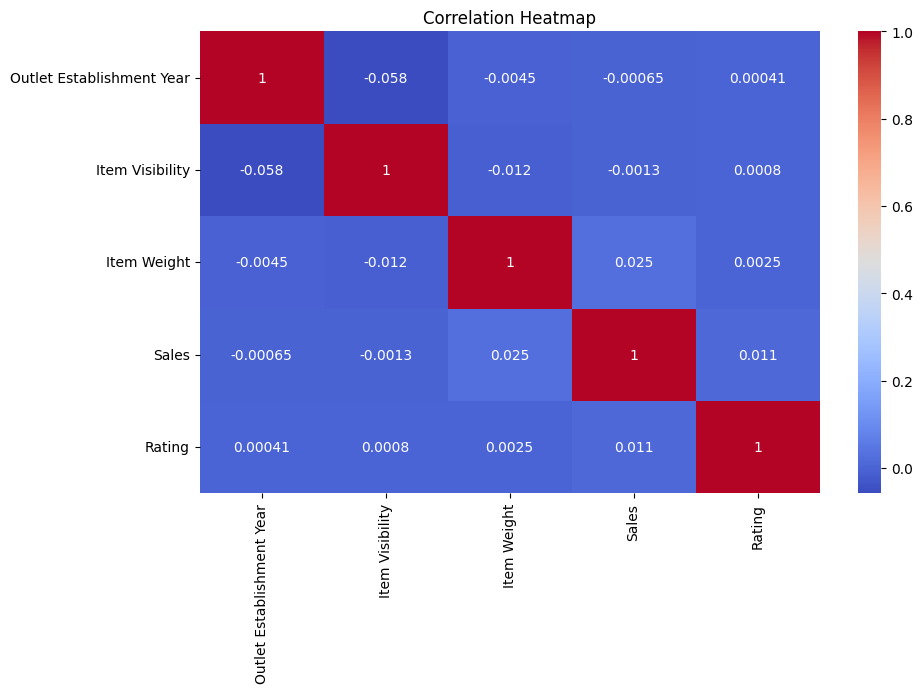

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now safely plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<span style="font-size:30px">line Chart</span>



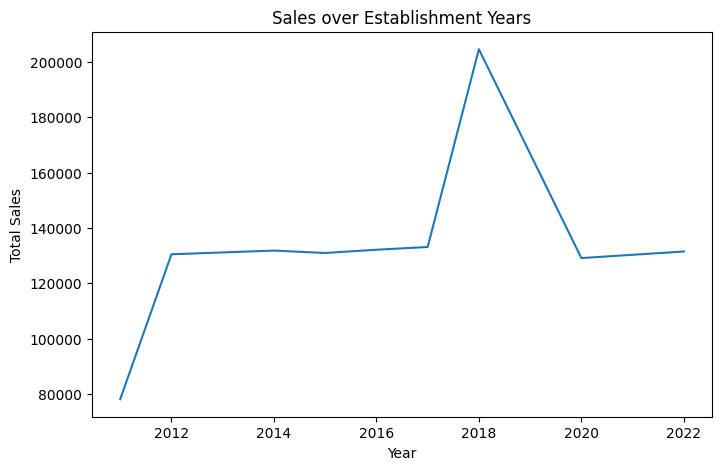

In [12]:
plt.figure(figsize=(8,5))
df.groupby('Outlet Establishment Year')['Sales'].sum().plot(kind='line')
plt.title('Sales over Establishment Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


<span style="font-size:30px">pie Chart</span>


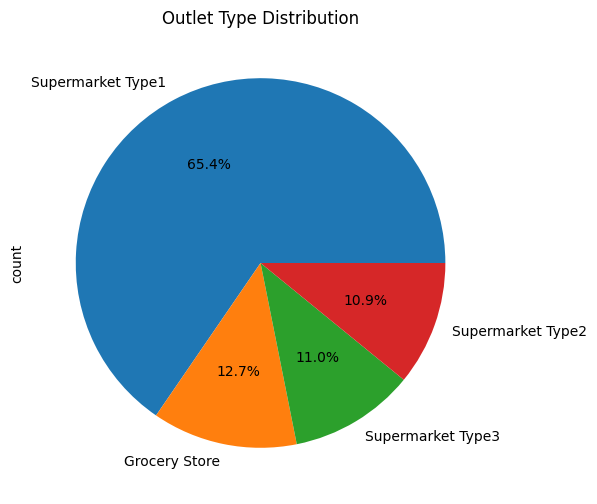

In [13]:
plt.figure(figsize=(6,6))
df['Outlet Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Outlet Type Distribution')
plt.show()


<span style="font-size:30px">Histogram</span>


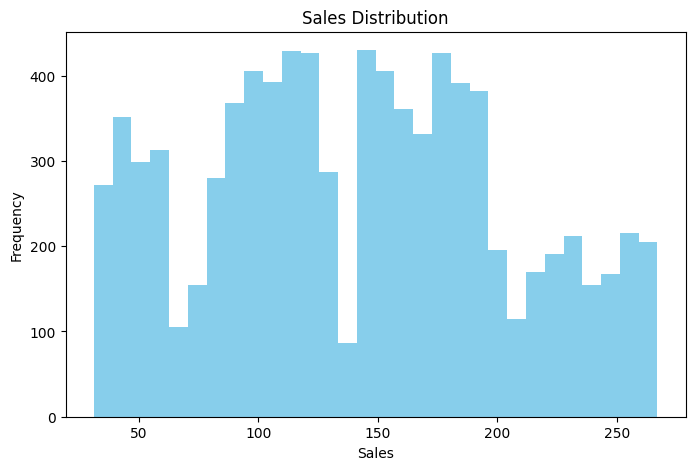

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=30, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


<span style="font-size:30px">Scatter Plot</span>


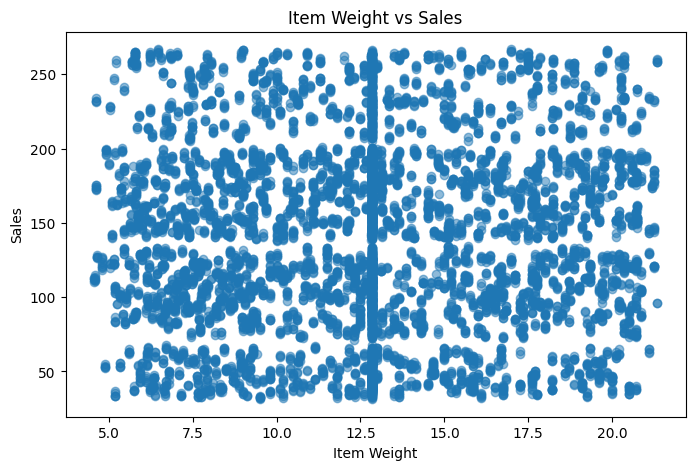

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df['Item Weight'], df['Sales'], alpha=0.5)
plt.title('Item Weight vs Sales')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()


<span style="font-size:30px">Box Plot</span>


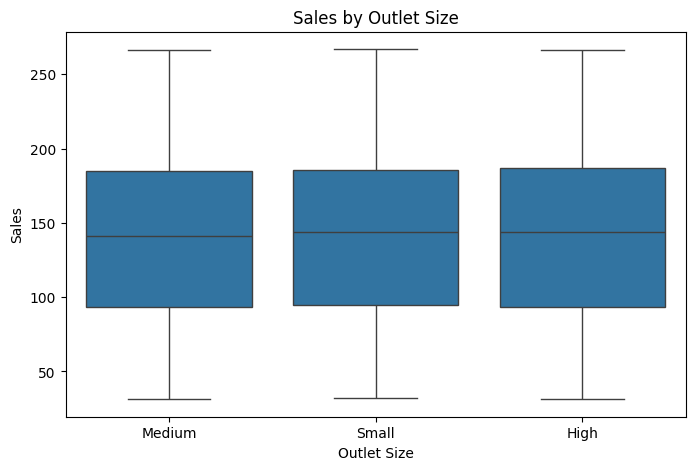

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet Size', y='Sales', data=df)
plt.title('Sales by Outlet Size')
plt.show()


<span style="font-size:30px">Sales Distribution by Item Type (Bar Plot)</span>


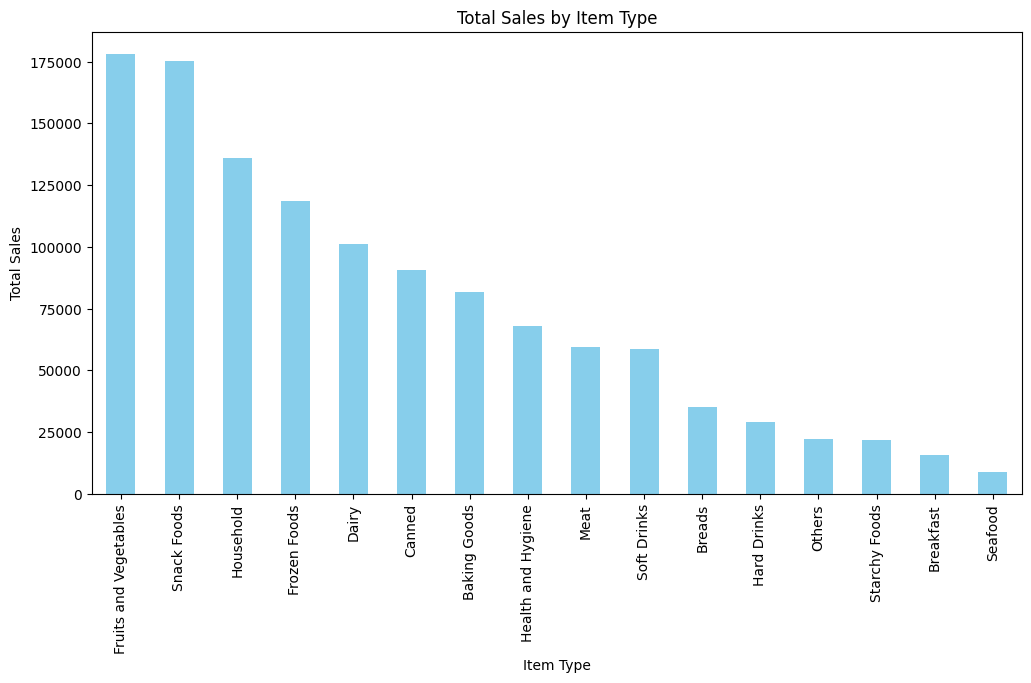

In [17]:
plt.figure(figsize=(12,6))
df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Sales by Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


<span style="font-size:30px">Boxplot for Sales vs Item Fat Content</span>


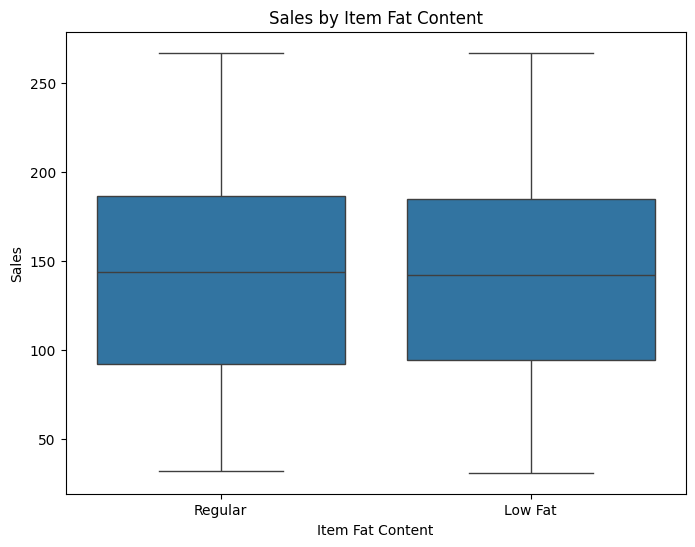

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Item Fat Content', y='Sales', data=df)
plt.title('Sales by Item Fat Content')
plt.show()


<span style="font-size:30px">Sales by Outlet Type (Pie Chart)</span>


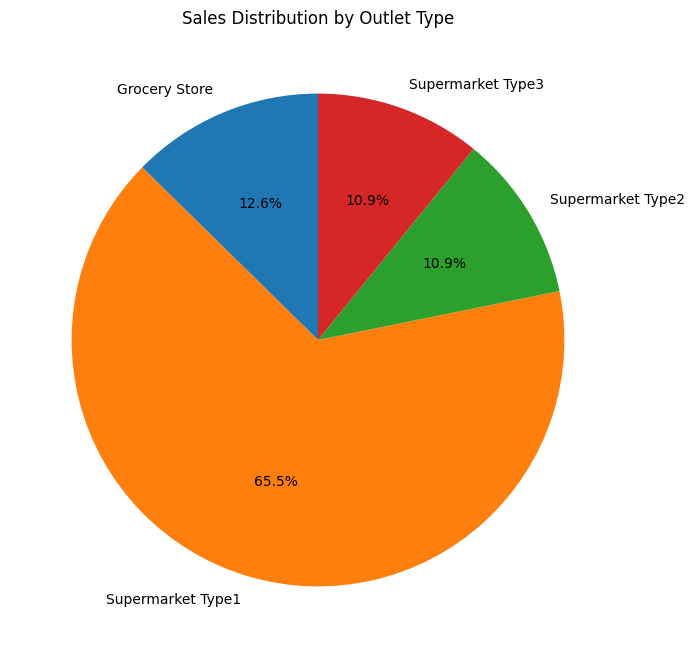

In [19]:
plt.figure(figsize=(8,8))
df.groupby('Outlet Type')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Outlet Type')
plt.ylabel('')
plt.show()


<span style="font-size:30px">Sales Trend by Establishment Year</span>



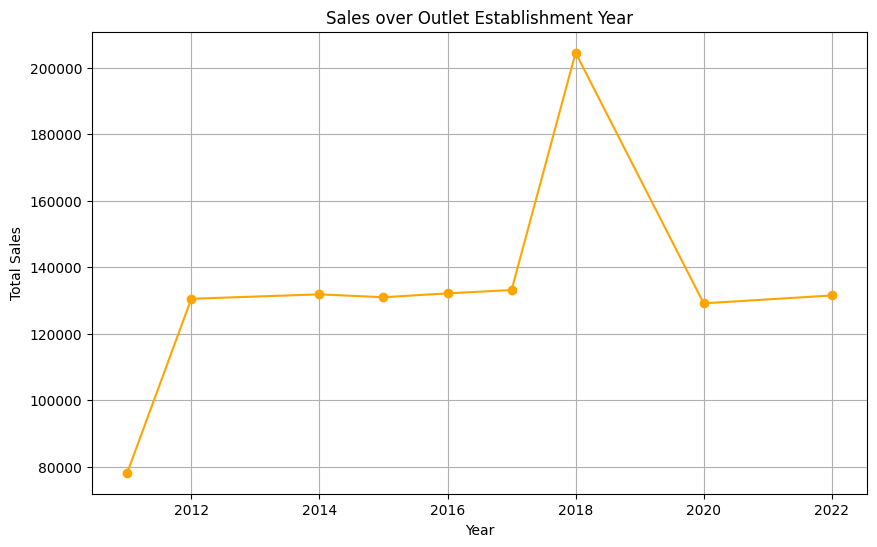

In [20]:
plt.figure(figsize=(10,6))
df.groupby('Outlet Establishment Year')['Sales'].sum().plot(marker='o', linestyle='-', color='orange')
plt.title('Sales over Outlet Establishment Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


<span style="font-size:30px">Violin Plot for Sales by Outlet Location Type</span>


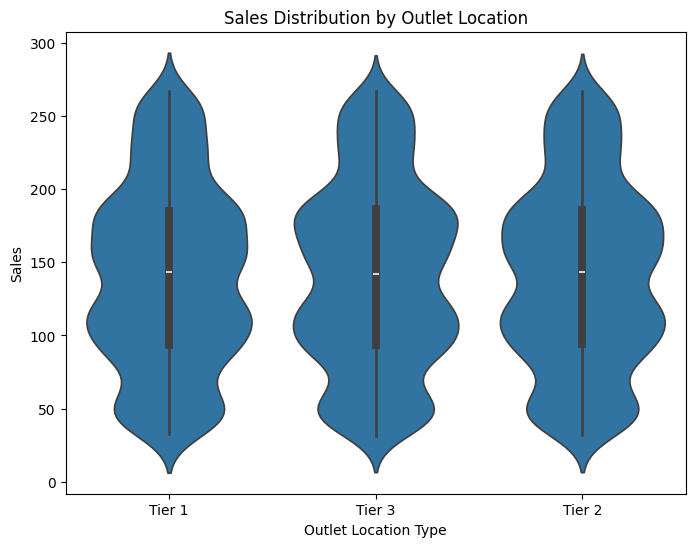

In [21]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Outlet Location Type', y='Sales', data=df)
plt.title('Sales Distribution by Outlet Location')
plt.show()


<span style="font-size:30px">Scatter plot (Item Visibility vs Sales)

</span>


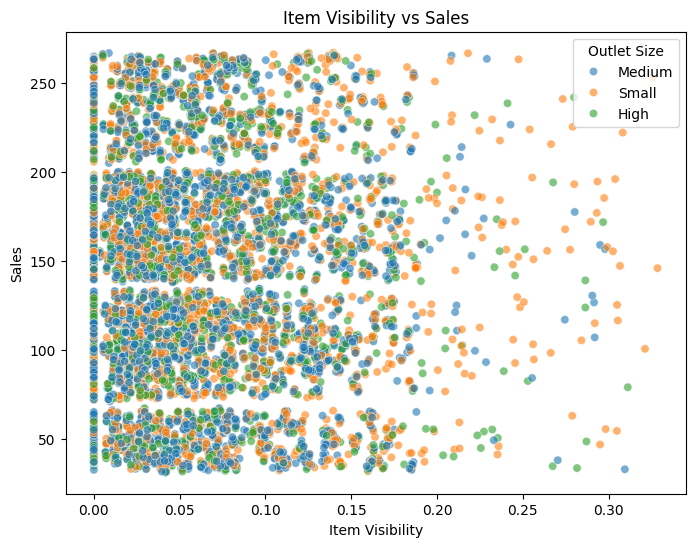

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Item Visibility', y='Sales', hue='Outlet Size', data=df, alpha=0.6)
plt.title('Item Visibility vs Sales')
plt.show()
